In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('data_penjualan.csv', usecols=['ReceiptNumber', 'Date', 'Items', 'Quantity', 'NetSales'])

In [77]:
df.head(1000)

,ReceiptNumber,Date,Items,Quantity,NetSales
0,TSBZIO,1/1/2023,Lemon Tea,1.0,14400.0
1,TSBZIP,1/1/2023,Lychee Tea,1.0,20800.0
2,TSBZIP,1/1/2023,Kopi Rakyat,1.0,16000.0
3,TSBZIR,1/1/2023,Kopi Rakyat,3.0,78000.0
4,TSBZIR,1/1/2023,Kopi Rakyat,1.0,26000.0
...,...,...,...,...,...
1012,TSC0JL,1/14/2023,Kopi Sultan,1.0,29000.0
1013,TSC0JM,1/14/2023,Kopi Kow,1.0,34000.0
1014,TSC0JN,1/14/2023,Hazelnut Latte,1.0,32000.0
1015,TSC0JO,1/14/2023,Lychee Yakult,1.0,25000.0


In [79]:
df.dtypes

ReceiptNumber     object
Date              object
Items             object
Quantity         float64
NetSales         float64
dtype: object

In [59]:
#recency

day='2023-06-01'
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df['Date'])

result_df = df.drop_duplicates(['Items'])
recency = result_df.groupby(['Items']).agg({'Date': lambda x: ((day-x.max()).days)})
recency.head(100)

,Date
Items,
,150
Aglio Oglio,118
Aglio Oglio,118
Aglio Oglio,91
Almond Croissant,112
...,...
Kopi Kow,117
Kopi Kow,104
Kopi Rakyat,151


In [42]:
#frecuency

freq=df.drop_duplicates(subset="ReceiptNumber").groupby(["Items"])[["ReceiptNumber"]].count()

In [60]:
#Frecuency
freq.head(100)

,ReceiptNumber
Items,
,15
Aglio Oglio,1
Aglio Oglio,45
Aglio Oglio,4
Almond Croissant,29
...,...
Kopi Kow,42
Kopi Kow,12
Kopi Rakyat,425


In [61]:
#Monetary
df["total"] = df["NetSales"]*df["Quantity"]

In [62]:
#Monetary
money = df.groupby(['Items'])[['total']].sum()
money

,total
Items,
,48000.0
Aglio Oglio,40000.0
Aglio Oglio,40000.0
Aglio Oglio,48000.0
Almond Croissant,26000.0
...,...
Thai Tea,30000.0
Vanilla Latte,28000.0
Vanilla Latte,32000.0


In [63]:
df.dtypes

ReceiptNumber            object
Date             datetime64[ns]
Items                    object
Quantity                float64
NetSales                float64
total                   float64
dtype: object

In [66]:
RFM=pd.concat([recency,freq,money],axis=1)
recency.columns=["Recency"]
freq.columns=["Frecuency"]
money.columns=["Monetary"]



In [67]:
RFM.head(100)

,Recency,Frecuency,Monetary
Items,,,
,150,15.0,48000.0
Aglio Oglio,118,1.0,40000.0
Aglio Oglio,118,45.0,40000.0
Aglio Oglio,91,4.0,48000.0
Almond Croissant,112,29.0,26000.0
...,...,...,...
Kopi Kow,117,42.0,23200.0
Kopi Kow,104,12.0,29000.0
Kopi Rakyat,151,425.0,16000.0


In [68]:
#Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sim = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = sim.fit_transform(RFM)

scaler=StandardScaler()
scaled=scaler.fit_transform(imputed_data)




c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

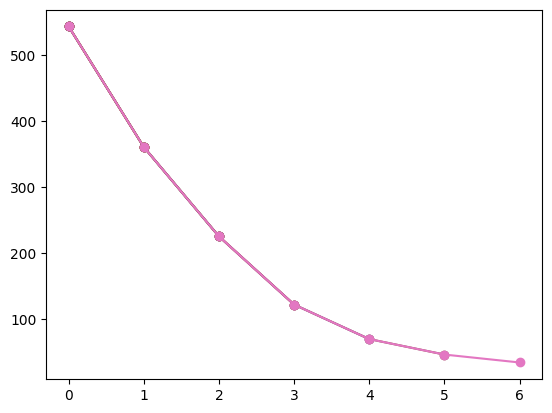

In [69]:
#Clustering
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    plt.plot(inertia, marker='o')
    